## Means Testing

#### A Note on the Central Limit Theorem

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30 [for each independent sample]) from the population, then the distribution of the sample means will be approximately normally distributed

In [3]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

### Distribution of sample means 
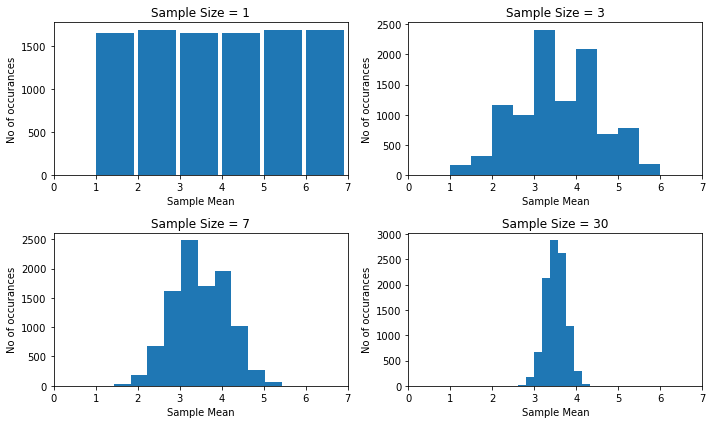

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

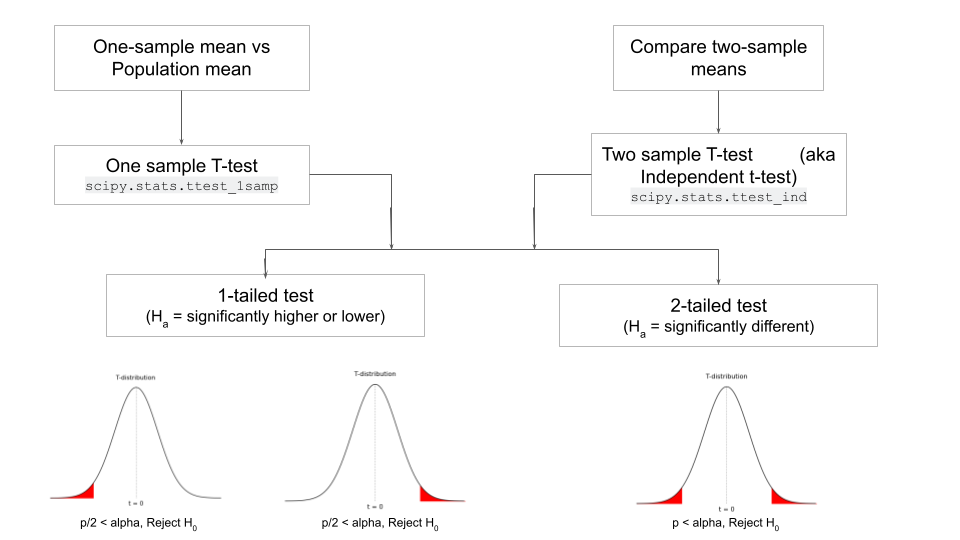

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

### Lets pull mpg, a familiar data set

In [7]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Off hand notes:

- automatic treansmission vehicles may have different highway mileage than manual transmisison cars
- older cars have lower city fuel efficiency than newer cars
- the displacement of older cars is different from all cars

In [8]:
#what determines an older car?
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [ ]:
# it appears in this case that 1999 cars are our best definition of older cars
#we will continue forward with this distinction

### H$_O$ (null hypothesis)
- The mean displacement of vehicles from 1999 is no different from all vehicles

### H$_a$ (alternative hypothesis)
- The mean displacement of vehicles from 1999 is different from all vehicles in our data

Determining our test:
    - we are comparing 1999 vehicles to *all* vehicles
        - this means that we want to perform a 1-sample test
    - we are comparing the means of 1999 vehicles to all vehicles by way oof sheer difference, we have a two tailed test.

In [ ]:
# mpg.displacement

<function matplotlib.pyplot.show(close=None, block=None)>

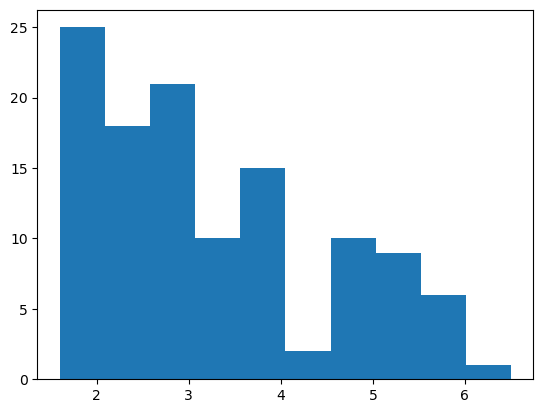

In [11]:
plt.hist(mpg[mpg.year == 1999].displ)
plt.show

In [ ]:
#this does look significantly tailed,
# due to the CLT ans the idea that this is likely skewed for a 
# multitude of reasons, Im currently goin to stick with a T-test
# we will get pickier about this later 

In [12]:
μth = mpg.displ.mean()
μth

3.4717948717948697

In [13]:
#confidence level = 0.95
α = 0.05

In [22]:
displ_old = mpg[mpg.year == 1999].displ

3.2811965811965806

In [16]:
#actually doing the t-test:

#first: the sample of mpg where the mpg year is equal to 1999(displ spacifically)
stats.ttest_1samp(displ_old, μth)

Ttest_1sampResult(statistic=-1.6361431738775498, pvalue=0.10452008593170263)

In [17]:
t_stat, p_val = stats.ttest_1samp(displ_old, μth)

In [20]:
t_stat

-1.6361431738775498

In [18]:
p_val

0.10452008593170263

In [19]:
p_val < α

False

#### Older cars have lower cty fuel efficiency than newer cars

first steps:
 - set a CL and alpha
 - determine if this is one sample or two sample
 - determine if this os one tailed or two tailed

H$_0$ : 1999 vehicles have an avg cty mileage that is >= as 2008 vehicles

H$_a$ : 1999 vehicles have a mean cty mileage that is lower than mean cty mileage of 2008 vehicles

In [25]:
# sample: 2008 cars vs 1999 cars
# two sample: independent t-test
# tailedness: 1999 vehicles have a cty metric that is LOWER than 2008 vehicles
#one tailed! : we have a sense of directionality 
#when we make this assesment, p/2 < a
# and t stat needs to be negative

In [26]:
# check out our spread of information

In [27]:
#make two variables here for our two values
cty_1999 = mpg[mpg.year == 1999].cty
cty_2008 = mpg[mpg.year != 1999].cty

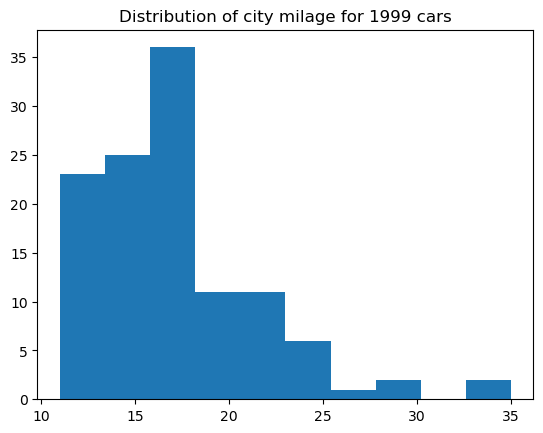

In [30]:
plt.hist(cty_1999)
plt.title('Distribution of city milage for 1999 cars')
plt.show()

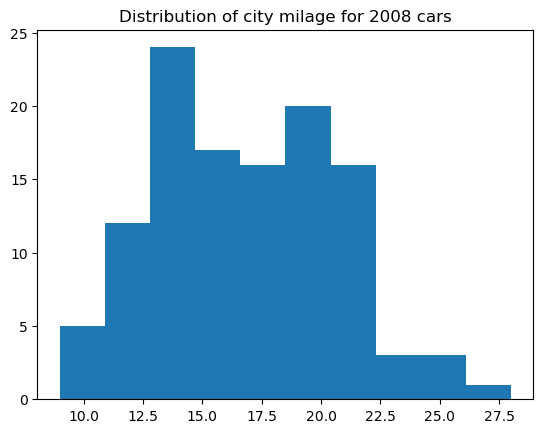

In [31]:
plt.hist(cty_2008)
plt.title('Distribution of city milage for 2008 cars')
plt.show()


Based on what we see here, CLT is still doing some lifting for us, however we see that 2008 cars seem to have more normal distribution off the cuff, which would tell us something about the way that sampling was taken on 1999 vehicles, or that 1999 vehicles have some outliers that may or may not need addressing in our data prep stage.

#### Lets check our other parameter of varience here:


H$_O$ : 1999 cars have a equal varience in cty mileage to 2008 cars

H$_a$ : 1999 cars have a different varience in cty mileage to 2008 cars

- sub-alpha: 0.05
- we'll run a levene test to check varience between the two
- if p < alpha, we will reject the null and say these groups have inequal varience

In [32]:
stats.levene(cty_1999, cty_2008)

LeveneResult(statistic=0.030273333475361427, pvalue=0.8620232104333374)

In [33]:
#p_value is really high! 0.86 is bigger than 0.05, therefore:
# I cannot reject the null hypothesis here!

In [34]:
#be mindfull when you feed arguments into ttest_ind 2hen you have a 1 tailed test!
t_stat, p_val = stats.ttest_ind(cty_1999, cty_2008, equal_var = True) 

In [35]:
t_stat

0.5674988409997608

In [36]:
p_val

0.5709240495406107

In [37]:
(p_val / 2) < α

False

Once again, I cannot reject my null hypothesis.
Both because p/2 is not less than alpha, and because
my t statistic is not less than 0.

### Auto trans cars may have different hwy mileage than manual trans cars

In [39]:
# groups for testing:
# - auto trans cars
# - manual trans cars

#two sample because there are teo explicit subcategories of vehicles
#two tailed because we are not aplying directionality to our diffence(i.e: <, >, =) just that theyre different

In [40]:
#ttest_ind

In [41]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [43]:
#using a str method for starts with 'auto', i creat a new column with the boolean value for auto trans or not
mpg['auto_trans'] = mpg.trans.str.startswith('auto')

In [ ]:
#My two groups of comparision: 
# - hwy mileage of auto trans cars
# - hwy mileage of manual trans cars (!= auto)

In [44]:
# use that masking to determine our two sample groups
auto_hwy = mpg[mpg['auto_trans'] == True].hwy

manual_hwy = mpg[mpg['auto_trans'] == False].hwy

H$_0$: There is no difference in hwy mileage between auto and manual transmission vehicles

H$_a$: There is a difference in hwy mileage between auto and manual transmission vehicles

In [ ]:
#independence check :passed
# varience check: lets see!

#do a levene test to check varience

In [48]:
α = 0.05

_, levene_p = stats.levene(auto_hwy, manual_hwy)

In [49]:
levene_p < α

False

In [50]:
#we cannot reject the null hypothesis, we will presume equivalent varience here

In [51]:

auto_hwy.size, manual_hwy.size

(157, 77)

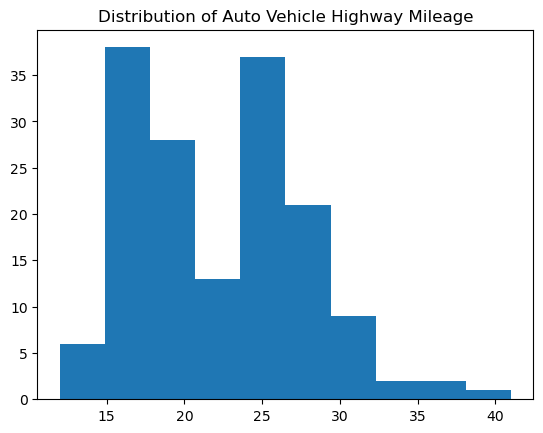

In [52]:
plt.hist(auto_hwy)
plt.title('Distribution of Auto Vehicle Highway Mileage')
plt.show()

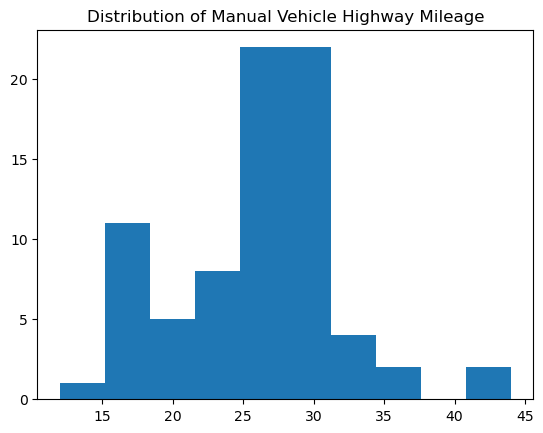

In [53]:
plt.hist(manual_hwy)
plt.title('Distribution of Manual Vehicle Highway Mileage')
plt.show()